In [18]:
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql import functions as F
from pyspark.sql.functions import trim
from pyspark.sql.functions import col

In [2]:
spark = SparkSession.builder.appName('Practice_session_2').getOrCreate()

In [3]:
spark

# Pre-processing

In [43]:
# read the dataset
df = spark.read.csv('quarterly_data_test_v2.csv',header=True,inferSchema= True)

In [44]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Quarter: string (nullable = true)
 |-- Electricity_Transfers: integer (nullable = true)
 |-- Gas_Transfers: integer (nullable = true)
 |-- Total_Electricity_Customers: integer (nullable = true)
 |-- Total_Gas_Customers: integer (nullable = true)
 |-- Year_/_Quarter: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [45]:
df = df.select('Year',
 'Quarter',
 'Electricity_Transfers',
 'Gas_Transfers',
 'Total_Electricity_Customers',
 'Total_Gas_Customers',
 'Year_/_Quarter')

In [46]:
# df.show()

In [47]:
df_trimmed = df.withColumn("Quarter", trim(df["Quarter"]))

In [92]:
# df_trimmed.show()

In [78]:
# Use replace to replace values in a column
df_trimmed_1 = df_trimmed.withColumn("Quarter", col("Quarter")).replace("Jan to Mar",'Q1')
df_trimmed_2 = df_trimmed_1.withColumn("Quarter", col("Quarter")).replace("Apr to Jun",'Q2')
df_trimmed_3 = df_trimmed_2.withColumn("Quarter", col("Quarter")).replace("Jul to Sep",'Q3')
df_trimmed_4 = df_trimmed_3.withColumn("Quarter", col("Quarter")).replace("Oct to Dec",'Q4')

In [79]:
df_trimmed_4.groupBy('Year').count().orderBy('Year').show()

+----+-----+
|Year|count|
+----+-----+
|2003|    4|
|2004|    4|
|2005|    4|
|2006|    4|
|2007|    4|
|2008|    4|
|2009|    4|
|2010|    4|
|2011|    4|
|2012|    4|
|2013|    4|
|2014|    4|
|2015|    4|
|2016|    4|
|2017|    4|
|2018|    4|
|2019|    4|
|2020|    4|
|2021|    4|
|2022|    4|
+----+-----+
only showing top 20 rows



## Gas and Electricity Transfers per Year

<AxesSubplot:title={'center':'Total Energy Transfers'}, xlabel='Year'>

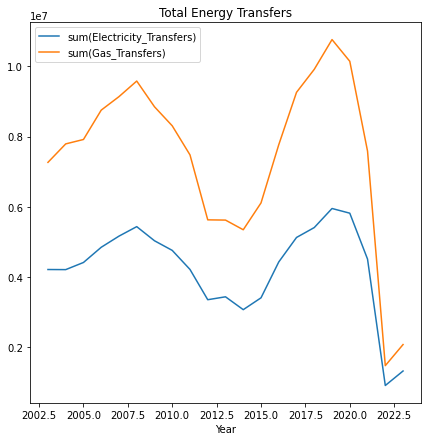

In [88]:
total_energy_transfer_per_year = df_trimmed_4.groupBy('Year').agg({'Gas_Transfers': 'sum', 'Electricity_Transfers': 'sum'})

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df_per_year = total_energy_transfer_per_year.toPandas()
# Sort the DataFrame by the 'Year' column
pandas_df_per_year = pandas_df_per_year.sort_values(by='Year')


# Plotting using Pandas
pandas_df_per_year.plot(kind='line', x='Year', y=['sum(Electricity_Transfers)', 'sum(Gas_Transfers)'],
               title='Total Energy Transfers', figsize=(7, 7), rot=0, stacked = True)

## Gas and Electricity Transfers per Quarter

<AxesSubplot:title={'center':'Total Energy Transfers'}, xlabel='Quarter'>

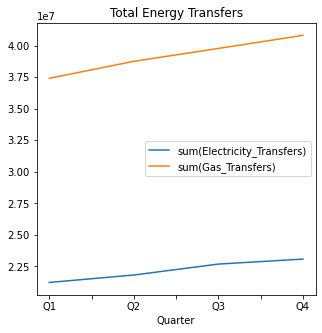

In [85]:
total_energy_transfers = df_trimmed_4.groupBy('Quarter').agg({'Gas_Transfers': 'sum', 'Electricity_Transfers': 'sum'})

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = total_energy_transfers.toPandas()

pandas_df = pandas_df.sort_values(by = 'Quarter')

# Plotting using Pandas
pandas_df.plot(kind='line', x='Quarter', y=['sum(Electricity_Transfers)', 'sum(Gas_Transfers)'],
               title='Total Energy Transfers', figsize=(5, 5), rot=0, stacked = True)

## Gas and Electricity Customers per Year

<AxesSubplot:title={'center':'Total Energy Customers per Year'}, xlabel='Year'>

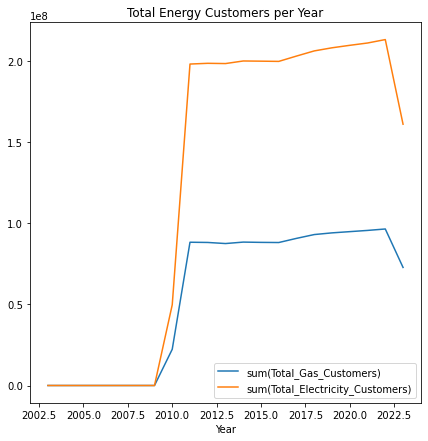

In [83]:
total_energy_customers = df_trimmed_4.groupBy('Year').agg({'Total_Gas_Customers': 'sum', 'Total_Electricity_Customers': 'sum'})

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = total_energy_customers.toPandas()
pandas_df = pandas_df.sort_values(by='Year')

# Plotting using Pandas
pandas_df.plot(kind='line', x='Year', y=['sum(Total_Gas_Customers)', 'sum(Total_Electricity_Customers)'],
               title='Total Energy Customers per Year', figsize=(7, 7), rot=0, stacked = True)

## Gas and Electricity Customers per Quarter

<AxesSubplot:title={'center':'Total Energy Customers per Year'}, xlabel='Quarter'>

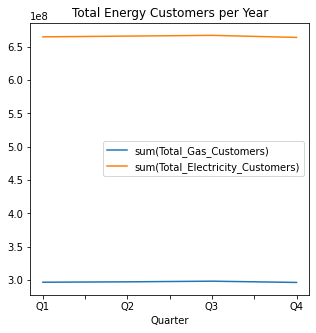

In [91]:
total_energy_customers = df_trimmed_4.groupBy('Quarter').agg({'Total_Gas_Customers': 'sum', 'Total_Electricity_Customers': 'sum'})

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = total_energy_customers.toPandas()
pandas_df = pandas_df.sort_values(by='Quarter')

# Plotting using Pandas
pandas_df.plot(kind='line', x='Quarter', y=['sum(Total_Gas_Customers)', 'sum(Total_Electricity_Customers)'],
               title='Total Energy Customers per Year', figsize=(5, 5), rot=0, stacked = True)